# Подбор параметров а и b 

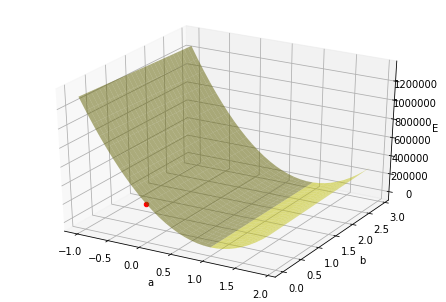

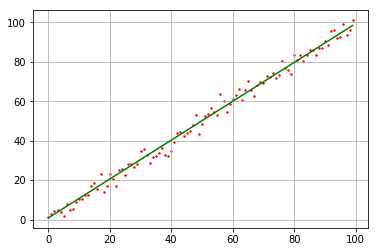

0.9861787267659962   0.8436721532485623


In [53]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# y - это эксперементальные значения
# a,b - параметры

def E(y,a,b): # suma(yi-axi+b)
    ff = np.array([a * z + b for z in range(N)])
    return np.dot((y-ff).T,(y-ff)) # Вычисляем квадрат разностей
#    Вычисляем Частные производные
def dEda(y,a,b):
    ff = np.array([a * z + b for z in range(N)]) # формирование прямой
    return -2  *np.dot((y-ff).T, range(N)) #Вычитание разности между эксперемент значениями и теоритич прямой

def dEdb(y,a,b):                                  # 0.5 2 и точки напрямой норм распр
    ff = np.array([a * z + b for z in range(N)]) 
    return -2 * (y-ff).sum()# вычитаем сумму разностей
N = 100 # число эксперементов
Niter = 50 #Число итераций
sigma =3 #стандартное отклонение наблюдаемых значений
at = 0.5 #теоритич значен параметра К      угловой коэфф прямой
bt = 2 #теоритич значен параметра B        смещение прямой

aa = 0 # начальное приближение пааметра at
bb = 0 # начальное приближение параметра bt
lmd1 = 0.000001 # шаги
lmd2 = 0.0005 #

f = np.array([at*z*bt for z in range(N)]) # Создаем теоритическую прямую
y = np.array(f+np.random.normal(0, sigma, N))# Разбрасываем точки вокруг прямой по норм распределению

a_plt = np.arange(-1,2,0.1)
b_plt = np.arange(0,3,0.1)
E_plt = np.array([[E(y,a,b) for a in a_plt] for b in b_plt])

plt.ion() # анимация
fig = plt.figure(2) # график
ax = Axes3D(fig) # 3d

a,b = np.meshgrid(a_plt,b_plt)
ax.plot_surface(a,b,E_plt, color='y',alpha = 0.5)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('E')
point = ax.scatter(aa,bb,E(y,aa,bb),c='red')

##################################### Град поиск #####################
for n in range(Niter):
    aa = aa - lmd1 * dEda(y,aa,bb)
    bb = bb - lmd2 * dEdb(y,aa,bb)
    #dEdb(y,aa,bb)    
#    print(aa,' ',bb)
 #   ax.scatter(aa,bb,E(y,aa,bb),c='red')
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02)
#plt.ioff()
plt.show()
#print (E_plt)
ff = np.array([aa*z+bb for z in range(N)])
plt.scatter(range(N), y, s=2, c='red')
plt.plot()
plt.plot(ff,c='green')
plt.grid(True)
plt.show()
print(aa,' ',bb)